In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('dummy_data.csv')
df.head()


,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [5]:
df.shape

(1000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [7]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [8]:
df.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['platform'].value_counts()

platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64

In [11]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [12]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

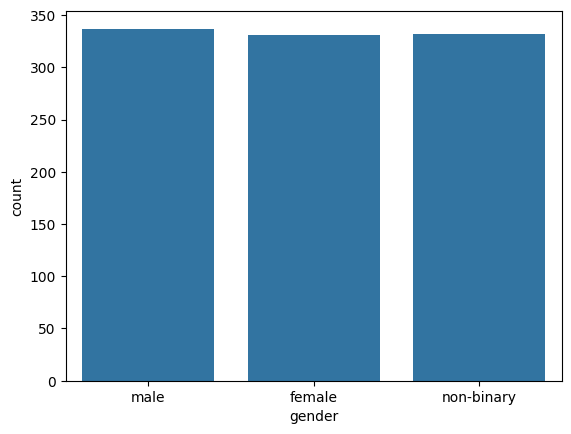

In [13]:
sns.countplot(x='gender',data=df)
plt.show()

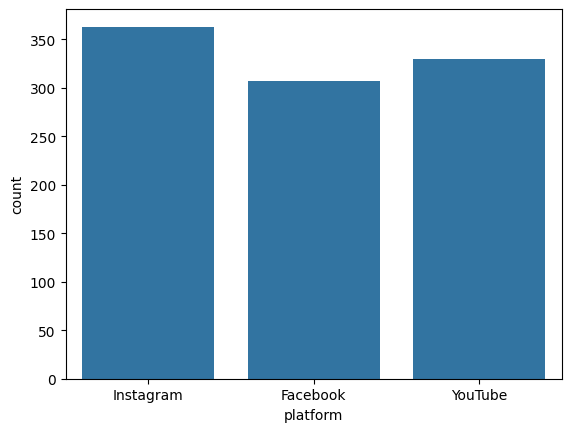

In [14]:
sns.countplot(x='platform',data=df)
plt.show()

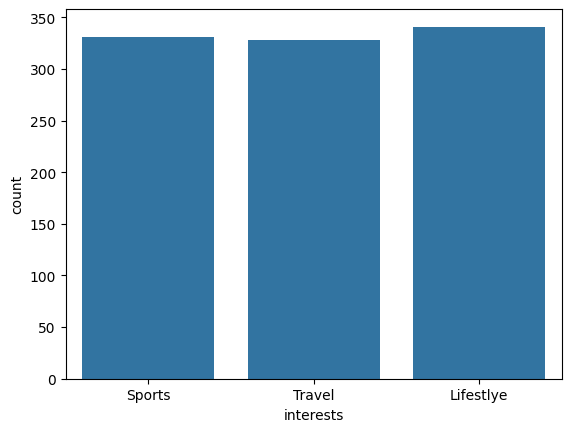

In [15]:
sns.countplot(x='interests',data=df)
plt.show()

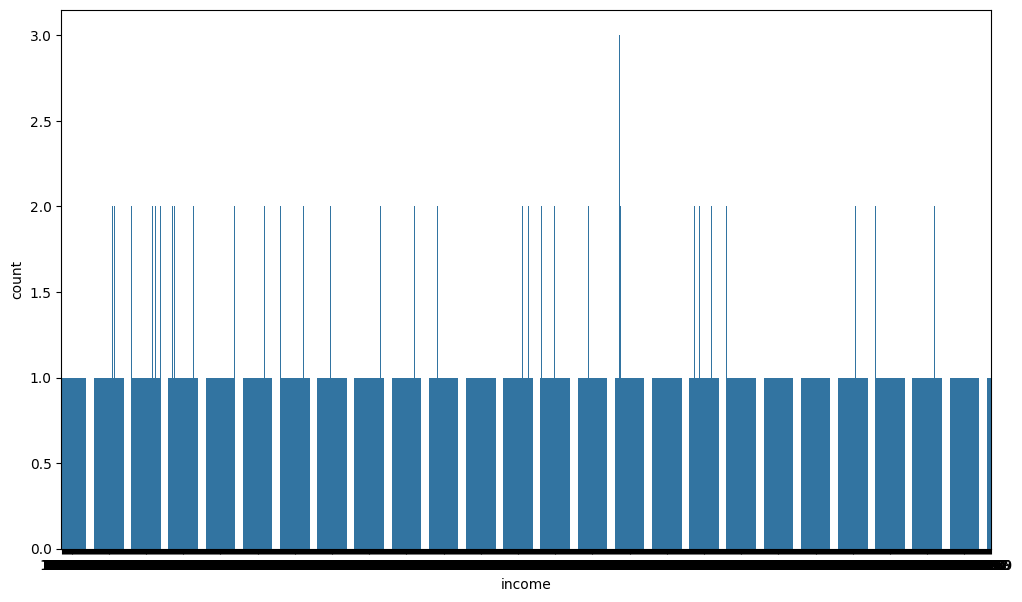

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(x='income',data=df)
plt.show()

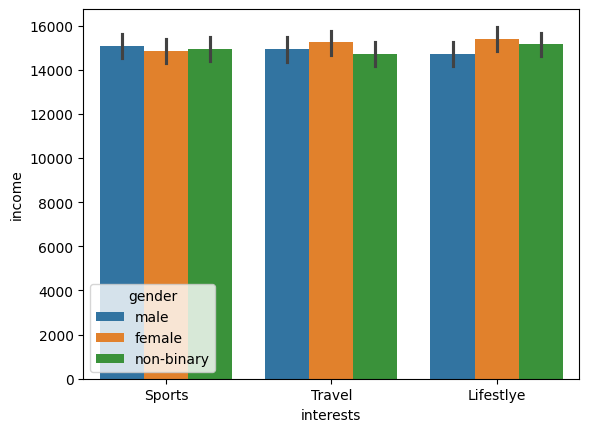

In [17]:
sns.barplot(x='interests',y='income',hue='gender',data=df)
plt.show()

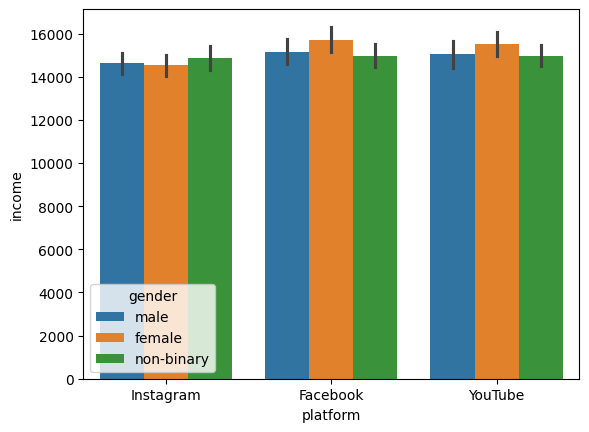

In [18]:
sns.barplot(data=df,x='platform',y='income',hue='gender')
plt.show()

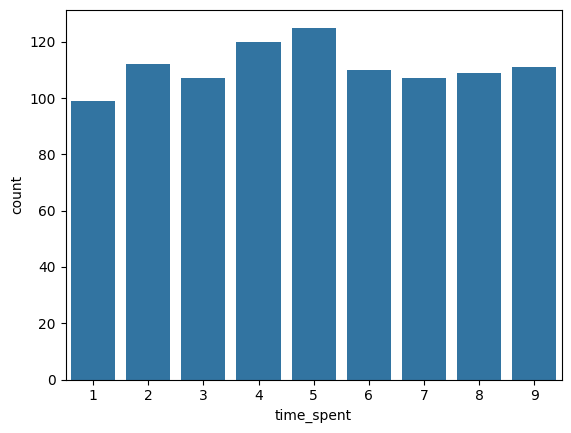

In [19]:
sns.countplot(x='time_spent',data=df)
plt.show()

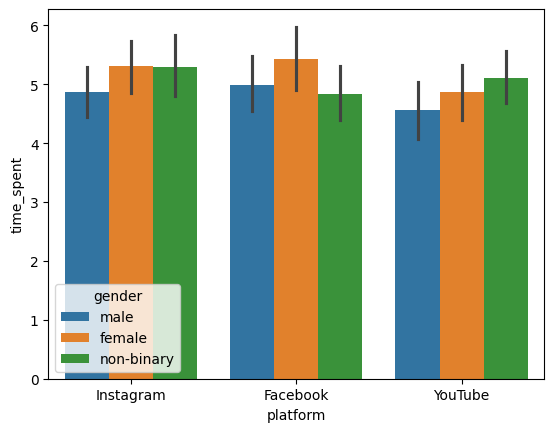

In [20]:
sns.barplot(data=df,x='platform',y='time_spent',hue='gender')
plt.show()

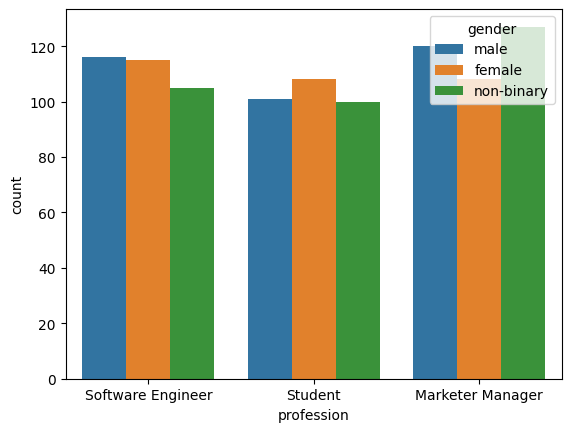

In [21]:
sns.countplot(x='profession',hue='gender',data=df)
plt.show()

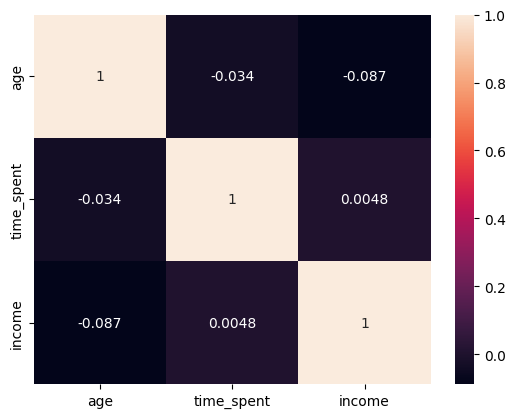

In [22]:
sns.heatmap(df[['age','time_spent','income']].corr(),annot=True)
plt.show()

In [23]:
df.income.describe()

count     1000.000000
mean     15014.823000
std       2958.628221
min      10012.000000
25%      12402.250000
50%      14904.500000
75%      17674.250000
max      19980.000000
Name: income, dtype: float64

In [24]:
q = [df.income.quantile(i) for i in [0.25, 0.5, 0.75, 1]]
def income_level(x):
    for i in range(len(q)):
        if x < q[i]:
            return f'q{i+1}'

df['income_Level'] = df.income.apply(income_level)

<Axes: ylabel='income_Level'>

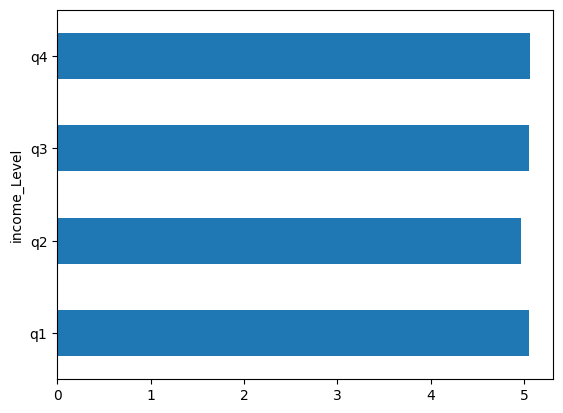

In [25]:
df.groupby('income_Level').time_spent.mean().plot(kind='barh')

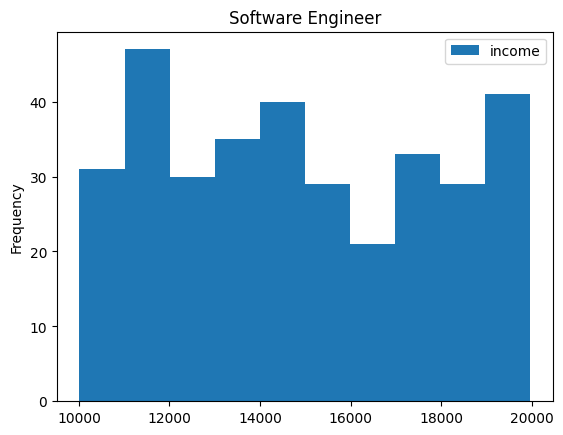

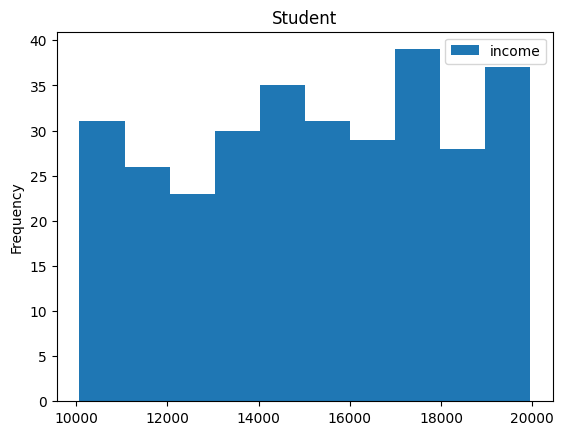

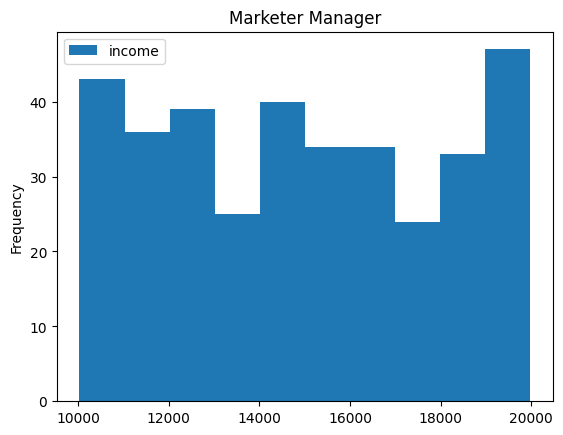

In [26]:
for p in df.profession.unique():
    df[p == df.profession].income.to_frame().plot(kind='hist', title=p)

<Axes: xlabel='age', ylabel='income'>

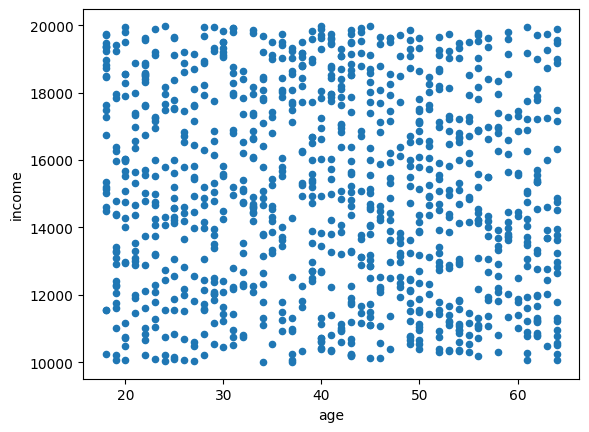

In [27]:
df.plot(kind='scatter', x='age', y='income')

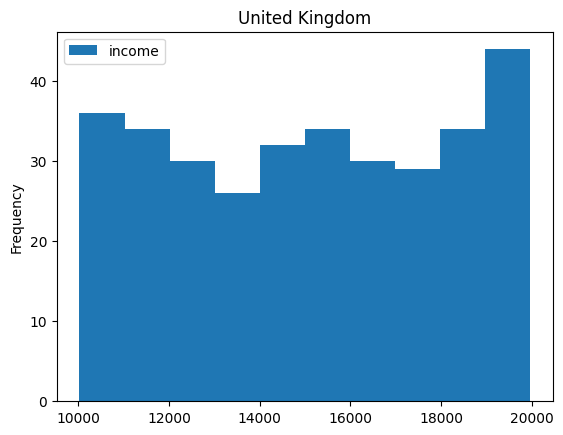

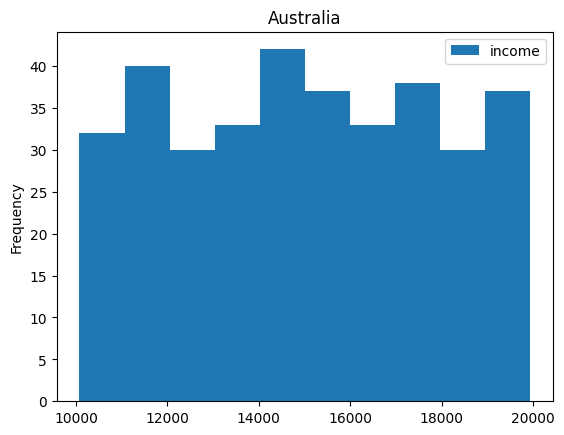

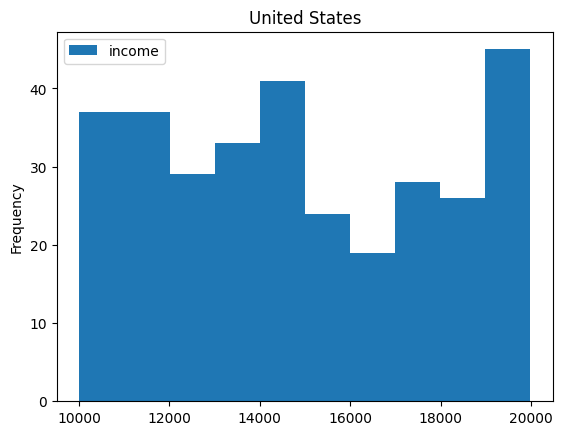

In [28]:
for l in df.location.unique():
    df[l == df.location].income.to_frame().plot(kind='hist', title=l)

In [41]:
df.dropna(inplace=True)

In [42]:
x=df.iloc[:,0:11]
y=df.iloc[:,-1]

In [43]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'x' is your input data
# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each column in your data and convert non-numeric values to numeric
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = label_encoder.fit_transform(x[col])

# Now your data should only contain numeric values
# Proceed with using StandardScaler
Clus_dataSet = StandardScaler().fit_transform(x)


In [44]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(x)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.11267215,  0.        , -0.8005575 , ...,  1.61253232,
         1.00501759, -1.01512945],
       [ 0.37178068, -1.22843943, -1.19472061, ..., -1.50479849,
         1.00501759,  0.98509604],
       [-0.66546739,  0.        ,  1.17025803, ..., -0.59295384,
        -0.99500746, -1.01512945],
       ...,
       [-1.03591312,  1.22843943, -0.01223129, ...,  0.87500096,
         1.00501759, -1.01512945],
       [ 1.48311788, -1.22843943, -0.4063944 , ...,  0.42754045,
         1.00501759,  0.98509604],
       [-1.6286263 , -1.22843943,  1.17025803, ...,  0.43126364,
        -0.99500746,  0.98509604]])

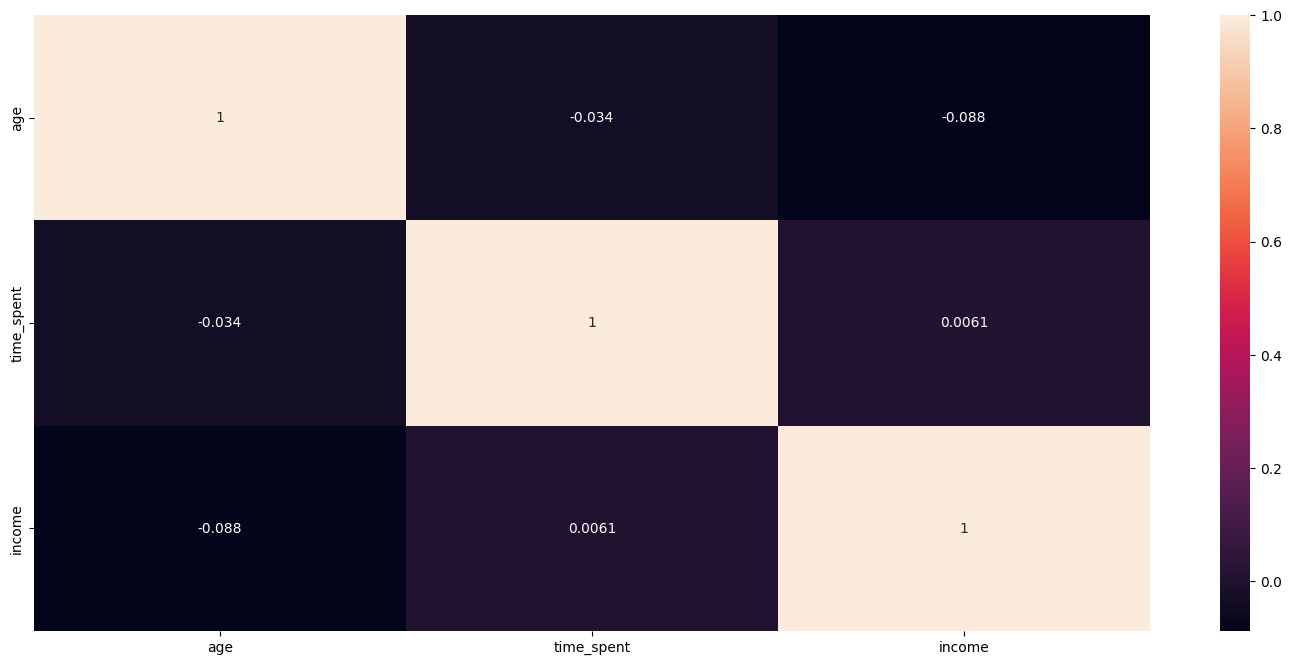

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Remove non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(18,8))
sns.heatmap(correlation, annot=True)
plt.show()

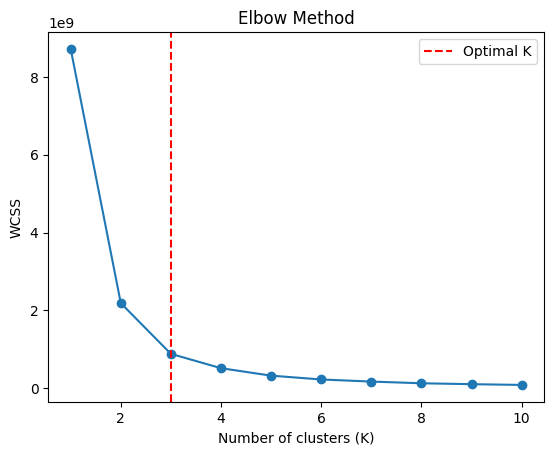

In [48]:
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# Choose the range of K
k_range = range(1, 11)

# Calculate WCSS for each K
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Find the elbow point
knee = KneeLocator(list(k_range), wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow

# Plot the elbow curve with the knee/elbow point
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.axvline(x=optimal_k, color='red', linestyle='--', label='Optimal K')
plt.legend()
plt.show()

In [49]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

In [50]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6124337492208829


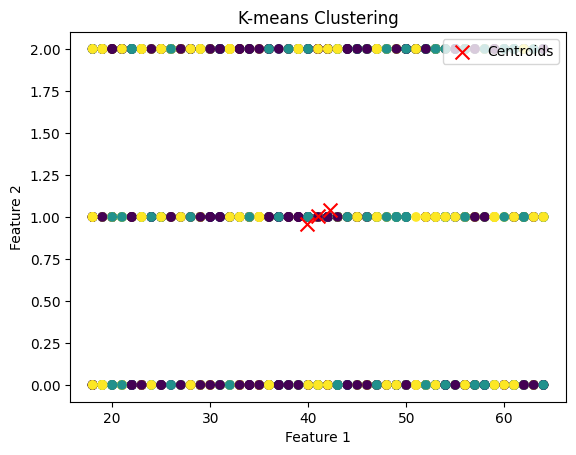

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()